# Numerical Solutions of 1st-order ODEs

For numerically solving definite integrals ($\int_a^b f(x) dx$) we have methods like the trapezoidal rule and Simpson's rule. When we need to solve 1st-order ODEs of the form
\begin{equation}
y^{\prime} = \frac{dy}{dx} = f(x, y)
\end{equation}
for $y(x)$, we need other methods. All of them will work by starting at the initial conditions, and then using information provided by the ODE to march forward in the solution, based on an increment (i.e., step size) $\Delta x$.

For example, let's say we want to solve 
\begin{equation}
\frac{dy}{dx} = 4 x - \frac{2 y}{x} \;, \quad y(1) = 1
\end{equation}
This problem is fairly simple, and we can find the general and particular solutions to compare our numerical results against:
\begin{align}
\text{general: } y(x) &= x^2 + \frac{x}{x^2} \\
\text{particular: } y(x) &= x^2
\end{align}

## Forward Euler method

Recall that the derivative, $y^{\prime}$, is the same as the slope. At the starting point, $(x,y) = (1,1)$, where $y^{\prime} = 2$, this looks like:

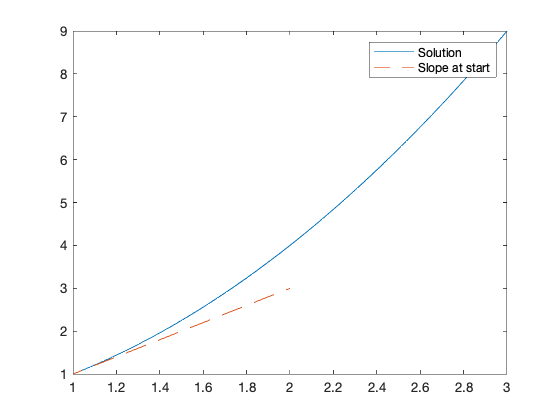

In [13]:
format compact
%plot inline

x = linspace(1, 3);
y = x.^2;
plot(x, y); hold on
plot([1, 2], [1, 3], '--')
legend(['Solution'], ['Slope at start'])
hold off

Remember that the slope, or derivative, is
\begin{equation}
\text{slope} = \frac{\text{rise}}{\text{run}} = \frac{\Delta y}{\Delta x}
\end{equation}

Let's consider the initial condition—the starting point—as $(x_i, y_i)$, and the next point in our numerical solution is $(x_{i+1}, y_{i+1})$, where $i$ represents an index starting at 1 and ending at the number of steps $N$. Our step size is then $\Delta x = x_{i+1} - x_i$.

Based on our (very simple) approximation to the first derivative based on slope, we can relate the derivative to our two points:
\begin{equation}
\left(\frac{dy}{dx}\right)_{i} = \frac{y_{i+1} - y_i}{x_{i+1} - x_i} = \frac{y_{i+1} - y_i}{\Delta x}
\end{equation}
Then, solve this for our unknown:
\begin{equation}
y_{i+1} = y_i + \left(\frac{dy}{dx}\right)_i \Delta x
\end{equation}
This is the **Forward Euler method**.

Based on a given step size $\Delta x$, we'll use this formula (called a *recursion* formula) to march forward and obtain the full solution over given $x$ domain. That will look something like this:

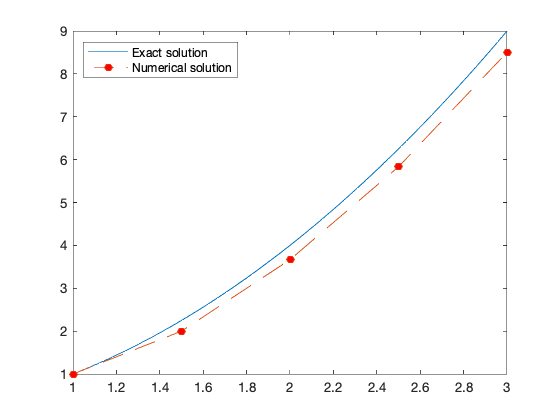

In [14]:
clear x y
x_exact = linspace(1, 3);
y_exact = x_exact.^2;
plot(x_exact, y_exact); hold on

% our derivative function, dy/dx
f = @(x,y) 4*x - (2*y)/x;

dx = 0.5;
x = 1 : dx : 3;
y(1) = 1;
for i = 1 : length(x)-1
    y(i+1) = y(i) + f(x(i), y(i))*dx;
end
plot(x, y, 'o--', 'MarkerFaceColor', 'r')

legend(['Exact solution'], ['Numerical solution'], 'Location','northwest')
hold off

Another way to obtain the recursion formula for the Forward Euler method is to use a Taylor series expansion.
Recall that for well-behaved functions, the Taylor series expansion says
\begin{equation}
y(x + \Delta x) = y(x) + \Delta x y^{\prime}(x) + \frac{1}{2} \Delta x^2 y^{\prime\prime}(x) + \frac{1}{3!} \Delta x^3 y^{\prime\prime\prime}(x) \dots \;.
\end{equation}
This is exact for an infinite series. We can apply this formula to our (unknown) solution $y_i$ and cut off the terms of order $\Delta x^2$ and higher; the derivative $y^{\prime}$ is given by our original ODE.
This gives us the same recursion formula as above:
\begin{equation}
\therefore y_{i+1} \approx y_i + \left( \frac{dy}{dx}\right)_i \Delta x
\end{equation}
where we can now see that we are introducing some error on the order of $\Delta x^2$ at each step. This is the *local truncation error*. The *global error* is the accumulation of error over all the steps, and is on the order of $\Delta x$. Thus, the Forward Euler method is a **first-order** method, because its global error is on the order of the step size to the first power: error $\sim \mathcal{O}(\Delta x)$.

Forward Euler is also an **explicit** method, because its recursion formula is explicity defined for $y_{i+1}$. (You'll see when that may not be the case soon.)

In general, for an $n$th-order method:
\begin{align}
\text{local error } &\sim \mathcal{O}(\Delta x^{n+1}) \\
\text{global error } &\sim \mathcal{O}(\Delta x^{n})
\end{align}
(This only applies for $\Delta x < 1$; in cases where you have a $\Delta x > 1$, you should nondimensionalize the problem based on the domain size such that $0 \leq x \leq 1$.)

Applying the Forward Euler method then requires:

1. Have a given first-order ODE: $\frac{dy}{dx} = y^{\prime} = f(x,y)$. Complex and/or nonlinear problems are fine!
2. Specify the step size $\Delta x$ (or $\Delta t$).
3. Specify the domain over which to integrate: $x_1 \leq x \leq x_n$
4. Specify the initial condition: $y(x=x_1) = y_1$

Let's do another example:
\begin{equation}
y^{\prime} = 8 e^{-x}(1+x) - 2y
\end{equation}
with the initial condition $y(0) = 1$, and the domain $0 \leq x \leq 7$. This is a linear 1st-order ODE that we can find the analytical solution for comparison:
\begin{equation}
y(x) = e^{-2x} (8 x e^x + 1)
\end{equation}

To solve, we'll create an anonymous function for the derivative and then incorporate that into our Forward Euler code. We'll start with $\Delta x = 0.2$.

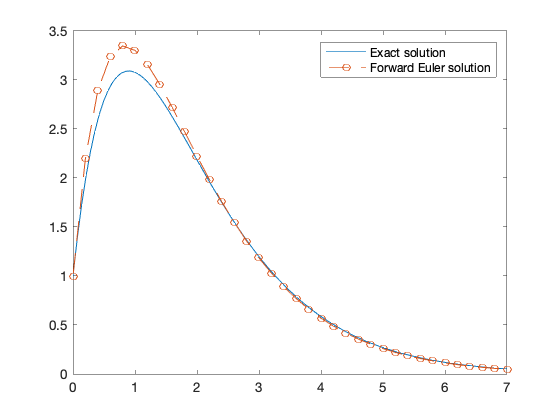

In [30]:
clear

f = @(x,y) 8*exp(-x)*(1 + x) - 2*y;

dx = 0.2;
x = 0 : dx : 7;
n = length(x);
y(1) = 1;

% Forward Euler loop
for i = 1 : n - 1
    y(i+1) = y(i) + dx*f(x(i), y(i));
end

x_exact = linspace(0, 7);
y_exact = exp(-2.*x_exact).*(8*x_exact.*exp(x_exact) + 1);
plot(x_exact, y_exact); hold on
plot(x, y, 'o--')
legend('Exact solution', 'Forward Euler solution')

Notice the visible error in that plot, which is between 0.2–0.25, or in other words $\mathcal{O}(\Delta x)$.

How can we reduce the error? Just like with the trapezoidal rule, we have two main options:

 - Reduce the step size $\Delta x$
 - Choose a higher-order (i.e., more accurate) method
 
The downside to reducing $\Delta x$ is the increased number of steps we then have to take, which may make the solution too computationally expensive. A more-accurate method would have less error per step, which might allow us to use the same $\Delta x$ but get a better solution. Let's next consider some better methods.

## Heun's method

Heun's method is a **predictor-corrector** method; these work by *predicting* a solution at some intermediate location and then using that information to get a better overall answer at the next location (*correcting*). Heun's uses the Forward Euler method to predict the solution at $x_{i+1}$, then uses the average of the slopes at $y_i$ and the predicted $y_{i+1}$ to get a better overall answer for $y_{i+1}$.

\begin{align}
\text{predictor: } y_{i+1}^p &= y_i + \Delta x f(x_i, y_i) \\
\text{corrector: } y_{i+1} &= y_i + \frac{\Delta x}{2} \left( f(x_i, y_i) + f(x_{i+1}, y_{i+1}^p) \right)
\end{align}

Heun's method is second-order accurate, meaning the global error is $\mathcal{O}(\Delta x^2)$ and explicit.

Let's see this method in action:

Maximum error: 0.055

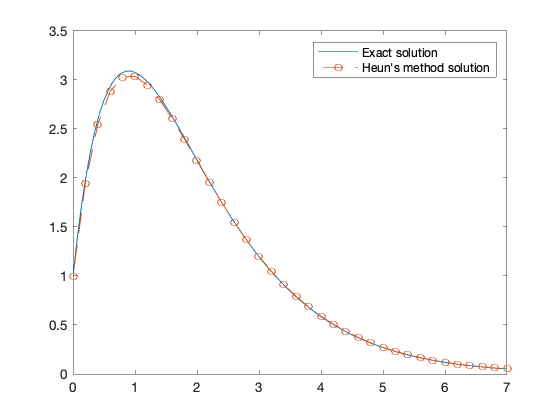

In [39]:
clear

f = @(x,y) 8*exp(-x)*(1 + x) - 2*y;

dx = 0.2;
x = 0 : dx : 7;
n = length(x);
y(1) = 1;

% Heun's method loop
for i = 1 : n - 1
    y_p = y(i) + dx*f(x(i), y(i));
    y(i+1) = y(i) + (dx/2)*(f(x(i), y(i)) + f(x(i+1), y_p));
end

x_exact = linspace(0, 7);
y_exact = exp(-2.*x_exact).*(8*x_exact.*exp(x_exact) + 1);
plot(x_exact, y_exact); hold on
plot(x, y, 'o--')
legend('Exact solution', "Heun's method solution")
fprintf('Maximum error: %5.3f', abs(max(y_exact) - max(y)))

Notice how the error is visibly smaller than for the Forward Euler method–the maximum error is around 0.05, which is very close to $\Delta x^2 = 0.04$.

## Midpoint method

The midpoint method, also known as the modified Euler method, is another predictor-corrector method, that instead predicts the solution at the midpoint ($x + \Delta x/2$):
\begin{align}
y_{i + \frac{1}{2}} &= y_i + \frac{\Delta x}{2} f(x_i, y_i) \\
y_{i+1} &= y_i + \Delta x f \left( x_{i+\frac{1}{2}} , y_{i + \frac{1}{2}} \right)
\end{align}

Like Heun's method, the midpoint method is explicit and second-order accurate:

Maximum error: 0.050

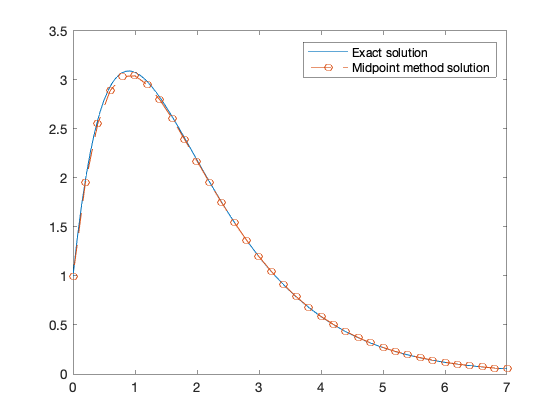

In [37]:
clear

f = @(x,y) 8*exp(-x)*(1 + x) - 2*y;

dx = 0.2;
x = 0 : dx : 7;
n = length(x);
y(1) = 1;

% midpoint method loop
for i = 1 : n - 1
    y_half = y(i) + (dx/2)*f(x(i), y(i));
    y(i+1) = y(i) + dx * f(x(i) + dx/2, y_half);
end

x_exact = linspace(0, 7);
y_exact = exp(-2.*x_exact).*(8*x_exact.*exp(x_exact) + 1);
plot(x_exact, y_exact); hold on
plot(x, y, 'o--')
legend('Exact solution', "Midpoint method solution")

fprintf('Maximum error: %5.3f', abs(max(y_exact) - max(y)))

## Fourth-order Runge–Kutta method

Runge–Kutta methods are a family of methods that use one or more stages; the methods we have discussed so far (Forward Euler, Heun's, and midpoint) actually all fall in this family. There is also a popular fourth-order method: the **fourth-order Runge–Kutta method** (RK4). This uses four stages to get a more accurate solution:
\begin{align}
y_{i+1} &= y_i + \frac{\Delta x}{6} (k_1 + 2 k_2 + 2 k_3 + k_4) \\
k_1 &= f(x_i, y_i) \\
k_2 &= f \left( x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2} k_1 \right) \\
k_3 &= f \left( x_i + \frac{\Delta x}{2}, y_i + \frac{\Delta x}{2} k_2 \right) \\
k_4 &= f \left( x_i + \Delta x, y_i + \Delta x \, k_3 \right)
\end{align}

This method is explicit and fourth-order accurate: error $\sim \mathcal{O}(\Delta x^4)$:

Maximum error: 0.0004

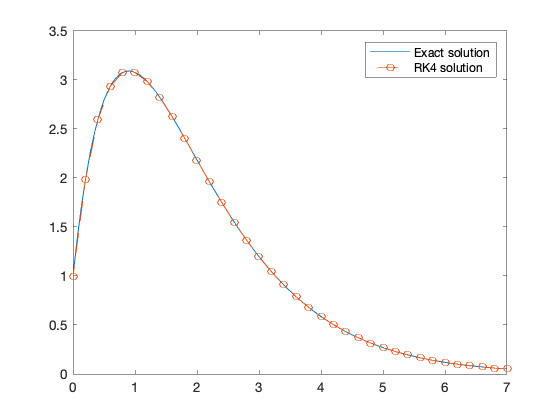

In [7]:
clear

f = @(x,y) 8*exp(-x)*(1 + x) - 2*y;

dx = 0.2;
x = 0 : dx : 7;
n = length(x);
y(1) = 1;

% 4th-order Runge-Kutta method loop
for i = 1 : n - 1
    k1 = f(x(i), y(i));
    k2 = f(x(i) + dx/2, y(i) + dx*k1/2);
    k3 = f(x(i) + dx/2, y(i) + dx*k2/2);
    k4 = f(x(i) + dx, y(i) + dx*k3);
    y(i+1) = y(i) + (dx/6) * (k1 + 2*k2 + 2*k3 + k4);
end

x_exact = linspace(0, 7);
y_exact = @(x) exp(-2.*x).*(8*x.*exp(x) + 1);
plot(x_exact, y_exact(x_exact)); hold on
plot(x, y, 'o--')
legend('Exact solution', "RK4 solution")

fprintf('Maximum error: %6.4f', max(abs(y_exact(x) - y)))

The maximum error (0.0004) is actually a bit smaller than $\Delta x^4 = 0.0016$, but approximately the same order of magnitude.

Matlab also offers a built-in RK4 integrator: `ode45`. (It is actually slightly more complicated than the equations shown just now, because it automatically adjusts the step size $\Delta x$ to control error.) You can call this function with the syntax:
    
    [X, Y] = ode45(function_name, [x_start x_end], [IC]);

where `function_name` is the name of a function that provides the derivative (this can be a regular function given in a file, or an anonymous function); `[x_start x_end]` provides the domain of integration ($x_{\text{start}} \leq x \leq x_{\text{end}}$), and `[IC]` provides the initial condition $y(x=x_{\text{start}})$.

For example, let's use this and compare with our exact solution:

Maximum error: 0.0007

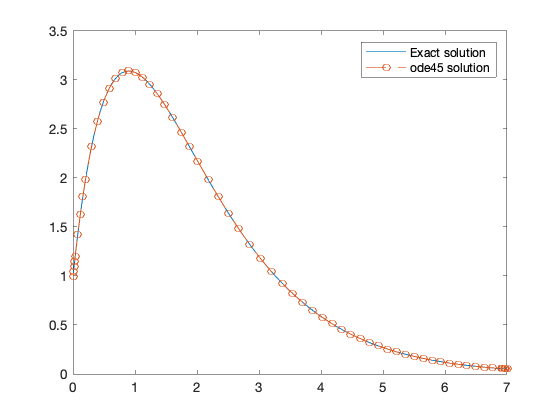

In [11]:
clear

f = @(x,y) 8*exp(-x)*(1 + x) - 2*y;

[X, Y] = ode45(f, [0 7], [1]);

x_exact = linspace(0, 7);
y_exact = @(x) exp(-2.*x).*(8*x.*exp(x) + 1);
plot(x_exact, y_exact(x_exact)); hold on
plot(X, Y, 'o--')
legend('Exact solution', "ode45 solution")

fprintf('Maximum error: %6.4f', max(abs(y_exact(X) - Y)))